# MLOps 기초

* 데이터를 받아오고 모델을 설계하고 모델 학습을 진행한 다음 모델 평가하는 과정
* 서비스로 운영하는 방법론 : MLOps 이론에 대해 공부
* MLOps는
  - Machine Learning Operations 의 약자로 , 머신 러닝(ML) 프로젝트의 라이프사이클을 간소화하고 자동화하는 것을 목표로 하는 일련의 관행, 도구 및 워크플로입니다. DevOps , Data Engineering , Machine Learning 의 원칙을 결합하여 데이터 과학자, ML 엔지니어 및 운영 팀 간의 원활한 협업을 가능하게 합니다.

## 프로젝트 목표
* 딥러닝 모델을
* KerasTuner로 하이퍼파라미터 튜닝을 한 뒤에
* TFServing으로 API를 만들어내는 것과
* tflite파일을 만드는 것이 목표

## 실험실 속 머신러닝 모델
* 머신러닝과 소프트웨어 개발 방식의 차이(Complex Models Erode Boundaries)
  - 머신러닝은 데이터에 따라서 소프트웨어 로직이 달라진다 -> 코드화가 어렵다

* 데이터 디펜더시(Data Dependencies Cost More than Code Dependencies)
  - 머신러닝에서의 디펜더시 -> 데이터 기반, 찾기가 어렵다
  _ 머신러닝에서 코드 디펜더시는 컴파일러로 해결가능
  - 소프트웨어 엔지니어링 환경 -> 복잡한 코드 디펜더시(종속성)
  - 데이터 디펜더시가 생긴 이유는 : 몇몇 입력 데이터에서 변환된 신호가 학습을 할때마다 변화할 수 있기 때문

* 피드백 순환루프(Feedback Loops)
  - 고정된 벤치마크 데이터셋을 이용해서 실험,
  - 현실에서의 머신러닝은 데이터셋이 고정되어 있지 않다.
  - 한 모델이 여러가지를 수행하는데 피드백을 받아 수정할때 다른 곳에도 영향을 미치는 것

* 머신러닝의 안티 패턴들(ML-System Anti-Patterns)
  - 실험실에서의 머신러닝: 추론과 학습이 실험의 대부분을 차지
  - 실제 머신러닝 시스템 : 데이터 수집부터 모니터링까지 다양한 영역을 커버
  - 머신러닝 시스템에서 접착 코드가 남발시 효율성이 떨어지고 추후 처리가 어려움
  - 데이터가 어떤 타입으로 인코딩 되어있는지, 다양한 라이브러리 ->  추후 개선작업이 어렵다

* 설정 부채(Configuration Debt)
  - 머신러닝은 하이퍼 파라미터 설정이 필수
  - 해당 feature를 사용여부, 데이터를 어떤 방식으로 선택하고 사용하는지, 전처리 결과등을 설정

* 현실에서 발생하는 변화들(Dealing with Changes in the External World)
  - 통제된 환경에서 만들어진 머신러닝, 현실세계의 머신러닝 시스템은 차이가 있다.
  - 모니터링과 테스팅을 지속적으로 진행해야함
  - 자동으로 변화에 따라 대응하는 시스템을 만들어야 한다.

## 1. MLOps의 정의와 ML 시스템의 구성요소

#### 머신러닝 시스템의 구성요소

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#!rm -rf "/content/drive/MyDrive/Colab Notebooks/aiffel_mlops"

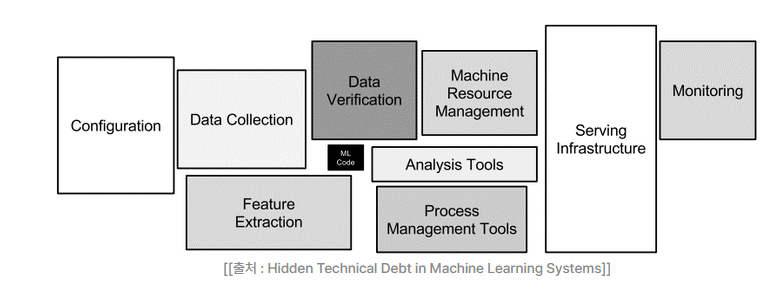

* 설정(Configuration) ; 데이터를 모을 때 어떤 방식으로 모아야 하고 ML 모델을 설계할 때 사용할 프레임워크, 서빙할 때 진행하는 방식과 같은 머신러닝 시스템에 전반적인 기획 내용을 포괄
* 데이터 수집 (Data Collection) : 데이터 수집은 가장 중요한 스텝, 좋은 데이터 수집은 좋은 모델이 나오게 하는 원동력으로 작용
* 특성 추출(Feature Extraction) : 해당 데이터에 대한 특성을 추출하는 작업이 필요(데이터에 대한 이해도)
* 데이터 검증 (Data Verification) : 검증과정을 거쳐 실제 데이터가 정확하고 사용가능한지를 확인
 - 데이터 검증(Data Verfication)은 데이터를 수집할 때 해당 데이터를 넣으면 정확도가 올라가고 지속적이라는걸 보장하기 위해서 데이터를 체크
 - 데이터 확인(Data Validation)은 데이터가 모델에서 허용하는 범위에 있는지를 확인하는 작업
* 분석 도구 (Analysis Tools) : 머신러닝 모델이 잘 만들어졌는지 확인하는 분석 도구가 필요, 해당 내용을 하나의 대시보드로 보고 확인하는 작업이 필요
  - 분석도구의 대표적인 사례로 TensorBoard, W&B, mlflow
* 프로세스 관리 툴(Process Management Tools) : 스케줄링과 모니터링 기능까지 포함
  - 대표적인 사례로 airflow, TFX, Kubeflow
* 리소스 관리 (Machine Resource Management) : 머신러닝 시스템에서 모델을 학습할 때 필요한 GPU와 같은 리소스 관리가 필요, 리소스 관리 툴이 필요
* 인프라 배포 (Serving Infrastructure) : 머신러닝 모델을 배포하는 것
  - 모델 예측 결과를 Database에 저장하여 사용하는 방식이 있거나 API를 사용하는 방식
  - BentoML과 Gradio가 대표적인 인프라 배포 툴로 유명
* 모니터링(Monitoring) : 모델을 모니터링하면서 해당 모델이 추가적으로 학습이 필요한 상황인지 분석
* 모니터링을 진행하면서 새로 학습을 진행할 경우에는 기존에 로그로 쌓아놓았던 데이터를 사용할지 혹은 아예 새로운 데이터로 만들지를 결정하는 단계
  - Google Cloud에서 사용하고 있는 VertexAI 대표 서비스


## 2. TFX (TensorFlow Extended) 소개하기

* MLOps를 하기 위해서, 사용할 오픈소스 플랫폼은 바로 TFX(TensorFlow Extended)
* 고성능 머신러닝 작업을 위해 설계된 머신러닝 파이프라인 오픈소스 플랫폼
  - 다양한 Component들이 TFX로 빌드가능
  - 개별적으로도 사용가능

* 장점 : TFX 단일 오픈소스 플랫폼로 End-to-End로 구현가능하다는 점

* Airflow는 범용적인 목적을 가진 task orchestration만을 지원
* Kubeflow는 머신러닝에서의 workflow orchestration과 Model management, notebook workspace까지 지원
  - Kubernetes를 구동해야 하기 때문에 리소스를 많이 먹는 편
* MLflow의 경우 간단하게 사용할 수 있고 Jupyter Notebook까지 지원
  - 하이퍼파라미터 튜닝을 지원하지 않는 단점



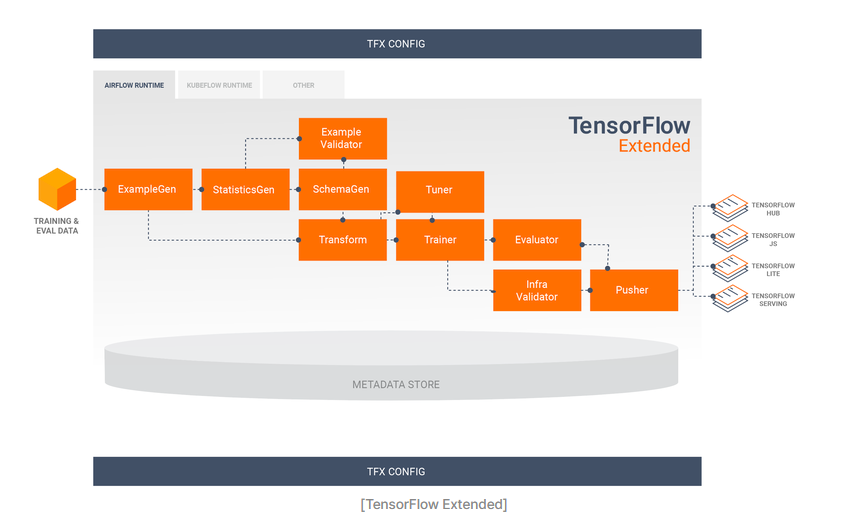

*  TFX는 컴포넌트로 관리하기 때문에 다양한 환경에서 사용할 수 있게 만들었습니다.
* CSV뿐만 아니라 BigQuery를 활용할 수도 있으며 Kubeflow pipeline으로 커스터마이징도 가능합니다.
* Google Cloud와의 연계도 뛰어나 Vertex AI를 활용하면 TFX 적용이 상당히 쉽습니다.
* TFX는 CPU/GPU같은 환경에 상관없이 사용가능

## TFX의 구성요소 - 컴포넌트

* 표준 컴포넌트와 커스터마이징이 된 컴포넌트로 구성

### ExampleGen
* 데이터를 TFX Pipeline으로 넣는 컴포넌트
* 입력 : CSV파일, TFRecord 혹은 BigQuery와 같은 외부 데이터 소스로 받고
* 출력 : tf.Example Record와 tf.SequenceExample records 혹은 .proto파일로 나옴
* TensorFlow Data Validation 라이브러리에서 사용하는 컴포넌트들로 데이터를 제공
   - SchmaGen, StatisticsGen, Example Validat

### StatisticsGen, SchemaGen, ExampleValidator
* StatisticsGen : ExampleGen 컴포넌트 출력을 입력으로 수락한 다음 통계를 생성하는 컴포넌트
* SchemaGen : 스키마를 생성하는 컴포넌트
  - 스키마 :DB내에 어떤 구조로 데이터의 개체, 속성, 관계 등을 고려하여 데이터가 저장되는가를 나타내는 데이터베이스의 논리적인 구조
* ExampleValidator : 훈련 및 제공 데이터에 있는 문제점을 식별하는 컴포넌트
  - StatisticsGen 컴포넌트에 의해 계산된 데이터 통계를 Schema와 비교해서 예제 데이터에서 문제를 뽑아낼 수 있습니다

 ### Transform
* Transform 컴포넌트 : 텐서플로 변환(TensorFlow Transform)이라고 불리며 데이터 전처리단계로 텐서플로우 그래프를 구성할 수 있다.
 - 데이터 스키마를 사용해 파이프라인에 수집된 데이터를 전처리
 - 결과물을 전처리 그래프로 시각화할 수 있게 출력하거나 머신러닝 모델을 내보낼 때 사용
 - 파이프라인의 Trainer 컴포넌트에서도 사용할 수 있게 변환
* Transform은 자연어처리에서의 ngram,bag of words, TFIDF등에 적용가능
* 컴퓨터 비전에서는 이미지를 디코딩하며 픽셀까지 조정가능
* Apache Beam : 배치 및 스트리밍 데이터 처리 파이프라인을 정의하고 실행하는 오픈 소스 통합 프로그래밍 모델

### Trainer
* TensorFlow로 모델을 작성하고 모델학습 코드를 만들고 해당 코드를 TFX에 통합시켜 파이프라인의 학습 단계를 처리하는 컴포넌트
* Trainer 컴포넌트를 학습하려면 컴파일된 Keras 모델이 필요
* Trainer 컴포넌트에서 모델 학습 API에서 fit 메소드를 사용해야 합니다
* savedModel을 사용해서 모델을 저장할 수 있습니다
* 텐서보드를 연결해 모델의 프로파일을 생성해 성능 병목 현상이 파악가능

### Tuner
* TFX의 Tuner : Keras에서 사용하는 KerasTuner, Google Cloud Platform에서 제공하는 Tuner를 사용할 수 있다.
* KerasTuner의 경우 코드로 제어할 수 있어 쉽게 하이퍼파라미터 튜닝을 할 수 있으며 병렬 튜닝도 지원해 효율성도 보장
* Oracle이라는 알고리즘으로 튜닝을 진행하는데, Grid Search나 Random Search뿐만 아니라 Bayesian Optimization도 지원해 하이퍼파라미터의 잠재적 최적값을 구할 수 있다.
* CloudTuner는 클라우드 비용이 발생

### Evaluator, Pusher
* Evaluator 컴포넌트 : TensorFlow Model Analysis라는 라이브러리를 활용해 검증 데이터셋 에 대한 모델 예측을 평가
  -  TensorFlow Model Analysis: Trainer 컴포넌트가 내보낸 모델을 기반으로 지표를 계산하는 라이브러리
* 전체 평가 데이터셋에 거쳐 지표를 계산
* TFMA를 구현하기 위해 사용하는 것
* 모델을 승인했는지 확인하고 승인받는다.

* Pusher 컴포넌트 : 모델을 서빙 파일 경로로 밀어넣는 컴포넌트
* 텐서플로 서빙에서 모델을 선택할 수 있게 된다.

### TensorFlow Serving
* 텐서플로우 그래프를 배포할 수 있으며 표준화된 엔드포인트로 그래프에서 예측할 수 있게 하는 라이브러리
* 모델 및 버전 관리를 처리하고 정책 기반으로 모델을 서비스하고 다양한 소스에서 모델을 로드할 수 있다.
* 저장된 모델에 대한 REST API추론 서버를 만들어내서 결과값을 반환

### 그렇다면 이번 노드에서 공부할 내용은?
* KerasTuner : 하이퍼파라미터 튜닝을 쉽게 할 수 있다.
* TensorFlow Serving : REST API추론 서버를 만들게 됨으로써 어플리케이션화시킬 수도 있다




## 3. AI도 데이터 중심으로! - Data Centric AI

### 한발 더 나아간 방법론 - Data Centric AI
* Data Centric AI 분야
  - 데이터의 질과 구조에 중점을 두는 인공지능 개발 방법론
  - 모델의 성능을 향상시키기 위해 데이터 자체를 개선하고 최적화하는 것이 핵심
  -  Label 검수하기, Confident Learning, 데이터 클리닝, 기준에 맞게 데이터셋 구축하기, Data Centric에 맞는 평가지표 만들기

* Label 검수하기
  - 데이터셋의 정확도와 신뢰도를 보장하기 위해 중요한 단계
  - 데이터에 할당된 label이 정확한지 확인하고, 오류나 불일치를 수정하는 작업이 반드시 들어가야 합니다

* Confident Learning
  - 불확실한 라벨을 가진 데이터를 식별하고 처리하는 방법
  - 노이즈가 있는 데이터를 없애고 노이즈를 추정하기 위해 계산하고 예제에 대한 랭킹을 매기는 학습방식
  - 노이즈 라벨에 대한 분포를 알 수 있어 추가적인 데이터 구축할 때 유용하게 사용할 수 있으며 label 오류 또한 검출할 수 있다
  - Python 라이브러리인 cleanlab을 통해서 쉽게 할 수 있다

* 데이터 전처리
  - 데이터의 label 분포가 골고루 되어 있는지를 확인하는 것뿐만 아니라 한쪽으로 치우쳐진 데이터들로 모델을 학습하는 방법도 포함
  - 이상치가 있는지 탐지하거나 이상치를 처리하는 과정
  - 서비스에서 쓰인 데이터가 다시 훈련 데이터로 들어가는 과정까지 설계

* 데이터셋 구축하기
  - 고품질의 데이터셋이 필수적
  - 관련 데이터를 수집, 정리, 라벨링하는 작업이 포함
  - 데이터셋 구축에 대한 기준점을 만드는것
  - 일정부분 모델을 만들어서 자동화하는 것

* Data Centric에 특화된 평가
  - 확률적으로 만들어 모델이 훈련 데이터 결과에 "얼만큼" 틀렸는지 확인하는 수단이 대표적

* 결론
  - 서비스와 연결해서 사용했을 때 큰 효과를 발휘
  - 모두 데이터셋을 확인하고 전처리를 거친 다음 피쳐 엔지니어링을 한 다음 모델에 넣고 결과를 도출
  - 딥러닝에서는 데이터를 받아온 다음 크기만 확인하고 모델에 넣고 더 좋은 결과를 얻기 위한 실험을 진행
  - 딥러닝에서도 데이터를 직접 확인하고 label이 제대로 붙어있는지 확인하는 작업이 필요하다라는 것을 시사


## 4. 모델을 더 완벽하게 만드는 방법 : KerasTuner
* KerasTuner : MLOps는 하이퍼파라미터 튜닝

* MNIST로 간단하게 할 수 있는 하이퍼파라미터 튜닝작업

In [ ]:
!mkdir "/content/drive/MyDrive/Colab Notebooks/aiffel_mlops"

In [ ]:
!pip install keras-tuner

In [ ]:
import tensorflow as tf
import keras
import keras_tuner as kt
from sklearn.model_selection import train_test_split
import os

In [ ]:
#  keras에 내장되어 있는 datasets 호출
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
# CNN을 사용할 예정이라 차원 수를 하나 더 추가
# label을 categorical을 활용해 변환

X_train = x_train.reshape(-1,28, 28, 1)
X_test = x_test.reshape(-1,28,28,1)

y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

print(X_train[0].shape)
print(X_test[0].shape)

print(y_train[0].shape)
print(y_test[0].shape)

(28, 28, 1)
(28, 28, 1)
(10,)
(10,)


In [ ]:
# scikit-learn에 내장되어 있는 train_test_split으로 train data와 validation data를 나누기
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2) #전체 6만개중 20%인 1만2천개가 검증데이타, 학습데이타:4만8천개
print(X_train.shape)

(48000, 28, 28, 1)


#### 사용자정의 DeepTuner
* kerastuner.Tuner를 인자로 하는 class,
* class에서 수행하는 함수는 run_trial, save_model, load_model함수
* run_trial() -  hypermodel과 trial 중요
  - hypermodel: 모델을 공유 및 재사용하기 위해 검색 공간을 캡슐화하는 모델
  - 하이퍼파라미터 튜닝에 대한 검색공간을 만들어줄때 hp라는 인수를 사용해서 만든 모델
  - hp라는 인수를 활용해서 keras.Model을 생성
  - build 메소드를 활용하면 모델이 빌드가 되면서 하이퍼파라미터 튜닝이 시작
* trial : Oracle에 속하는 class
  - KerasTuner의 모든 검색 알고리즘에서 사용하는 기본 클래스
  - RandomSearchOracle, BayesianOptimizationOracle, HyperbandOracle
  - Oracle: 하이퍼파라미터를 정할 때 사용하는 알고리즘
  - trial.hyperparameter는 Oracle이 찾아야 하는 하이퍼파라미터
  - hypermodel에서의 hp
  - model.fit()을 할때 batch_size도 고를 수 있게 만들었음

In [ ]:
#!rm -rf "/content/drive/MyDrive/Colab Notebooks/aiffel_mlops/my_keras_tuner"

In [ ]:
#
class DeepTuner(kt.Tuner):
    def run_trial(self, trial, X, y, validation_data, **fit_kwargs):
        #모델을 공유 및 재사용하기 위해 검색 공간을 캡슐화하는 모델
        model = self.hypermodel.build(trial.hyperparameters)

        #Oracle에 속하는 class(trial)
        model.fit(X, y, batch_size=trial.hyperparameters.Choice(
            'batch_size', [16, 32]), **fit_kwargs)

        X_val, y_val = validation_data
        eval_scores = model.evaluate(X_val, y_val)
        return {name: value for name, value in zip(
            model.metrics_names,
            eval_scores)}

#### build_model
* Input지정이 필수
* 여러분들이 넣고 싶은 모델에 대한 shape을 꼭 기재 -> 모델에 shape을 지정한다는 의미가???
*

In [ ]:
def build_model(hp):
    model = tf.keras.Sequential()
    model.add(tf.keras.Input(shape = X_train.shape[1:], name = 'inputs'))
    for i in range(hp.Int('num_layers', min_value=1, max_value=10)):
              model.add(tf.keras.layers.Conv2D(hp.Int(
                  'units_{i}'.format(i=i), min_value=32, max_value=128, step=5), (3,3),activation='relu'))
    model.add(tf.keras.layers.Flatten())
    for i in range(hp.Int('n_connections', 1, 3)):
        model.add(tf.keras.layers.Dense(hp.Choice(f'n_nodes',
                                  values=[32,64,128, 256]), activation = 'relu'))
    model.add(tf.keras.layers.Dense(10, activation='softmax', name = 'outputs'))
    model.compile(optimizer = 'adam',loss='categorical_crossentropy',
        metrics=['accuracy'])
    return model

* keras_tuner를 정의하고 탐색
* BayesianOptimizationOracle을 사용할 예정
* 목표는 accuracy와 max로 둘 예정
* trial은 10번으로 지정

In [ ]:
#
my_keras_tuner = DeepTuner(
    oracle=kt.oracles.BayesianOptimizationOracle(
        objective=kt.Objective('accuracy', 'max'),
        max_trials=10,
        seed=42),
    hypermodel=build_model,
    overwrite=True,
    project_name='/content/drive/MyDrive/Colab Notebooks/aiffel_mlops/my_keras_tuner')

# 해당 모델 학습시간은 약 10분정도 걸립니다!
my_keras_tuner.search(
    X_train, y_train, validation_data=(X_val, y_val), epochs=3)


Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
7                 |7                 |num_layers
32                |32                |units_0
2                 |2                 |n_connections
64                |64                |n_nodes

Epoch 1/3
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 285s 93ms/step - accuracy: 0.8867 - loss: 0.3692
Epoch 2/3
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 330s 96ms/step - accuracy: 0.9785 - loss: 0.0714
Epoch 3/3
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 309s 92ms/step - accuracy: 0.9832 - loss: 0.0533
375/375 ━━━━━━━━━━━━━━━━━━━━ 19s 50ms/step - accuracy: 0.9833 - loss: 0.0610


FatalValueError: Expected the returned dictionary from Tuner.run_trial() to have the specified objective, accuracy, as one of the keys. Received: {'loss': 0.06178359314799309, 'compile_metrics': 0.9828333258628845}.

In [ ]:
#!rm -rf "/content/my_keras_tuner"

In [ ]:
best_hps = my_keras_tuner.get_best_hyperparameters(num_trials=10)[0]
model = build_model(best_hps)
model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_69 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_70 (Conv2D)                   │ (None, 24, 24, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_71 (Conv2D)                   │ (None, 22, 22, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_72 (Conv2D)                   │ (None, 20, 20, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_73 (Conv2D)                   │ (None, 18, 18, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_74 (Conv2D)                   │ (None, 16, 16, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_75 (Conv2D)                   │ (None, 14, 14, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_15 (Flatten)                 │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 64)                  │         401,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ outputs (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 462,090 (1.76 MB)

 Trainable params: 462,090 (1.76 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train, y_train, batch_size=32, epochs = 5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8876 - loss: 0.3810
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9802 - loss: 0.0681
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9857 - loss: 0.0474
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9877 - loss: 0.0407
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9903 - loss: 0.0318


In [ ]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9808 - loss: 0.0654


[0.051018450409173965, 0.9847999811172485]

* 이제 모델을 저장할 차례
* HDF5파일 (.h5)로 저장하는 방법
* SavedModel은 모델, 가중치를 따로 구분해서 저장하는 방식
  - saved_model.pb : pb는 프로토콜 버퍼를 의미하며 해당 파일은 내보낸 모델 그래프 구조를 포함
  - variables : 내보낸 변수값이 있는 이진 파일과 내보낸 모델 그래프에 해당하는 체크포인트를 포함
  - assets : 내보낸 모델을 불러올 때 추가적인 파일이 필요한 경우 이 폴더에 파일이 생성

In [ ]:
!mkdir "/content/drive/MyDrive/Colab Notebooks/aiffel_mlops/best_model/1"

mkdir: cannot create directory ‘/content/drive/MyDrive/Colab Notebooks/aiffel_mlops/best_model/1’: No such file or directory


In [ ]:
#save_path = os.getenv('HOME') + '/aiffel/mlops/best_model/1'
#fname = os.path.join(save_path, 'model')
#model.save(fname)

NameError: name 'os' is not defined